In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from lab_helper import plot_boundaries
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from PlotCallback import PlotCallback

Using TensorFlow backend.


In [23]:
def generate_gaussians_distributions(sep=1, N=500, random_state=42, normalize=True):
    np.random.seed(random_state)
    # Zeros
    X1 = np.random.multivariate_normal(sep*np.array([0.5, 0.5]), [[0.1,-0.085],[-0.085,0.1]], N//2)
    # Ones
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    indexes = np.arange(len(y))
    np.random.shuffle(indexes)
    if normalize:
        X = (X - X.mean(axis=0))/X.std(axis=0)
    else:
        X[:, 0] = X[:, 0]
        X[:, 1] = X[:, 1]
    return X[indexes], y[indexes]

# Generamos un dataset de tamaño limitado

In [84]:
X, y = generate_gaussians_distributions(sep=1,N = 100, random_state=10)

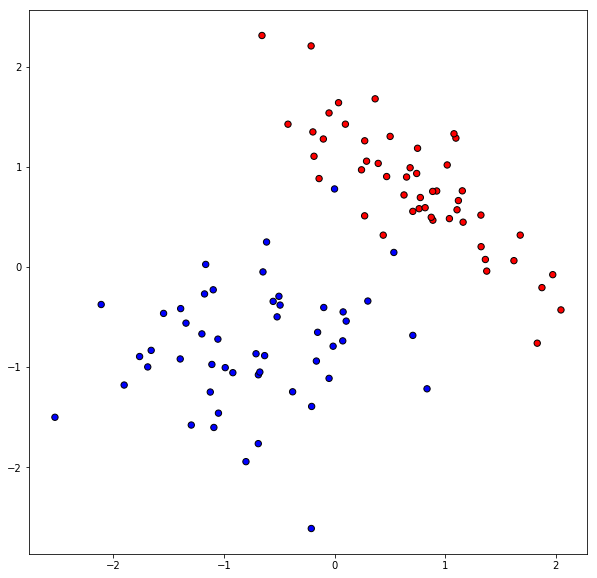

In [85]:
f, ax = plt.subplots(1, 1, figsize=(10,10))
plot_boundaries(X,y, ax=ax)

In [86]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import keras.backend as K
from sklearn.preprocessing import PolynomialFeatures

# Feature engineering (Polinomio de orden 4)

In [87]:
degree = 4
polyFeat = PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False)

In [88]:
X_poly = polyFeat.fit_transform(X)

In [89]:
X_poly.shape

(100, 14)

# Definimos modelo

In [75]:
model = Sequential()
# Que pasa si no pongo la función de activación??!
model.add(Dense(1, input_shape=(X_poly.shape[1],), activation='sigmoid'))

# Graficamos condición inicial particular (Aleatoria)

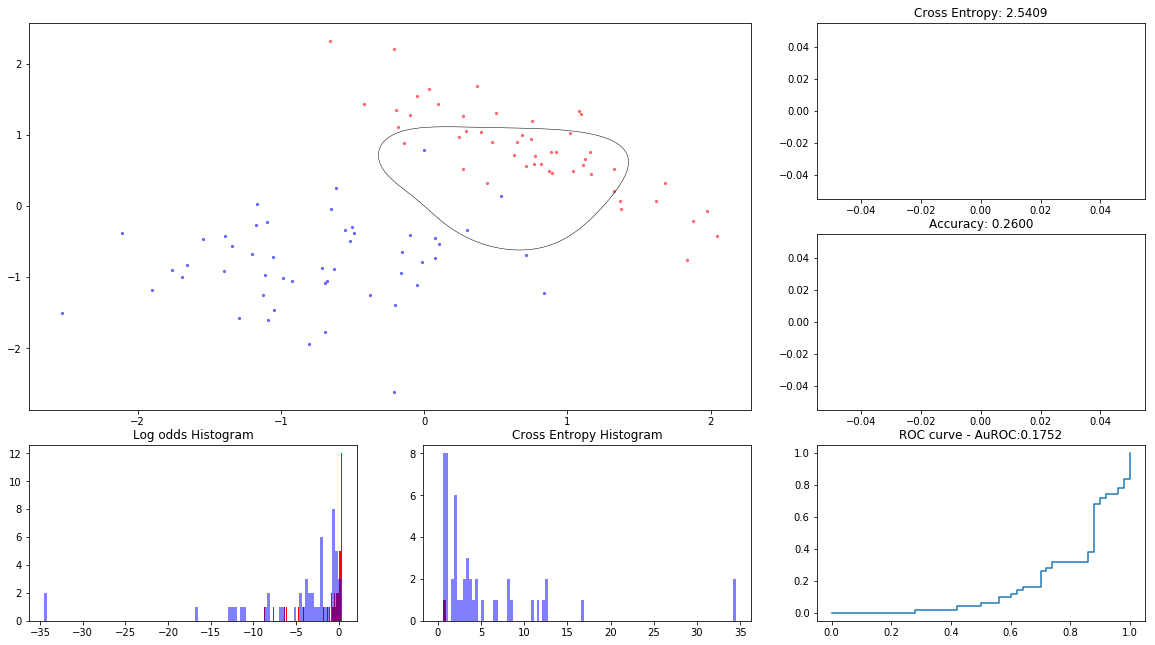

In [115]:
# model.save_weights('initial_weights_poly_4.hdf5')
model.compile(Adam(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.load_weights('initial_weights_poly_4.hdf5')
plotCallback_i = PlotCallback(X, y, degree=degree)
plotCallback_i.plotBoundary(model)

# Entrenamos modelo
Notar que con lr=1 da un resultado pero con lr=10 da otro

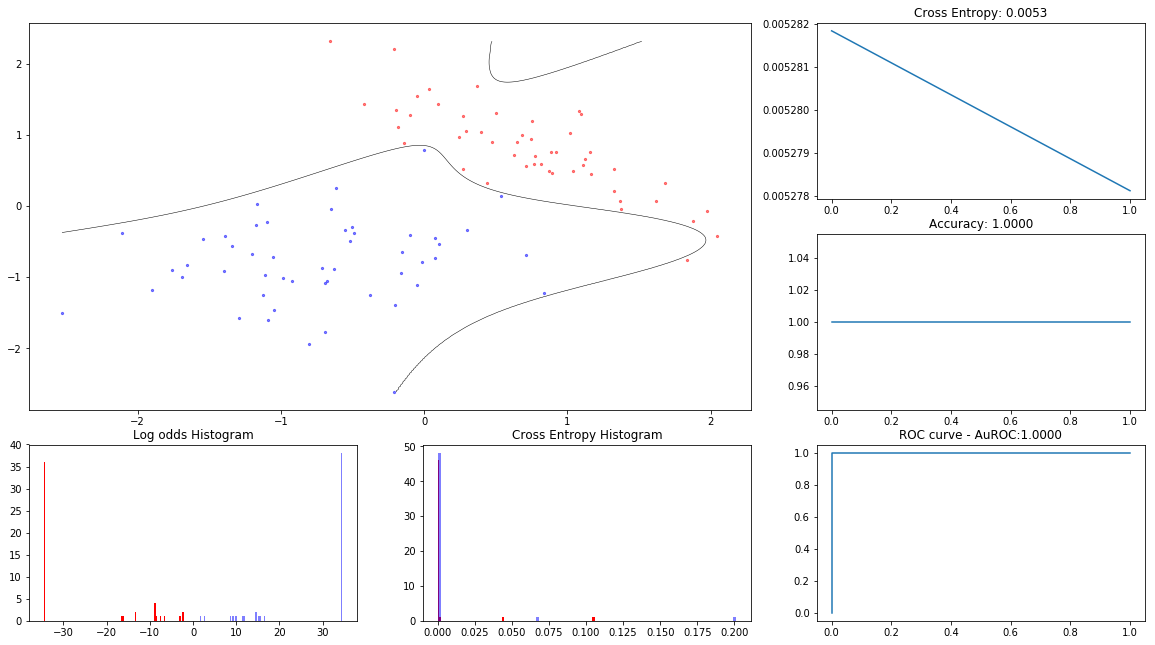

In [117]:
lr = 1
K.set_value(model.optimizer.lr, lr)
plotCallback = PlotCallback(X, y, degree=degree)
batch_size = 100
model.fit(X_poly, y, epochs=2000, verbose=0, batch_size=batch_size)
model.fit(X_poly, y, epochs=2, verbose=1, callbacks=[plotCallback], batch_size=batch_size)

# Generamos datos con las distribuciones originales y vemos el accuracy
Equivalente a un accuracy de test

In [122]:
# model.save_weights('final_weights_poly_4.hdf5')
# model.load_weights('final_weights_poly_4.hdf5')

In [123]:
X_f, y_f = generate_gaussians_distributions(sep=1,N = 5000, random_state=10)

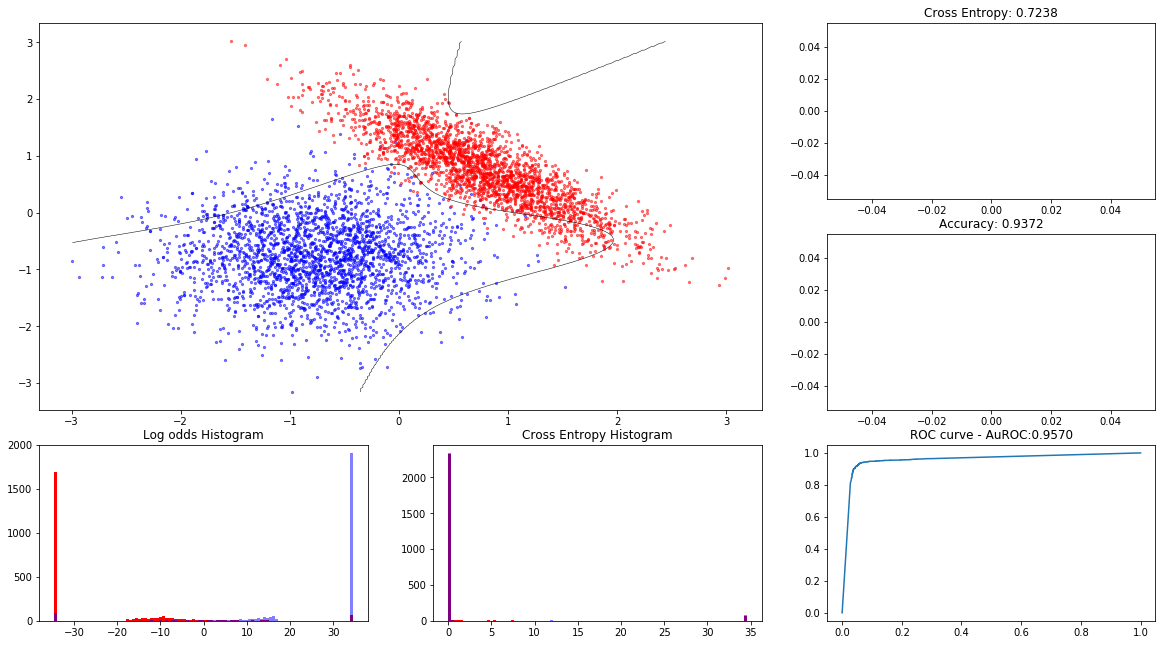

In [124]:
plotCallback_f = PlotCallback(X_f, y_f, degree=degree)
plotCallback_f.plotBoundary(model)